In [19]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('dark_background')

In [20]:
df=pd.read_csv('C:/Users/USER/sanutobegin/DA/datas/advertising.csv')

In [21]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [23]:
df.isnull().mean()*100

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

# outlier treatment

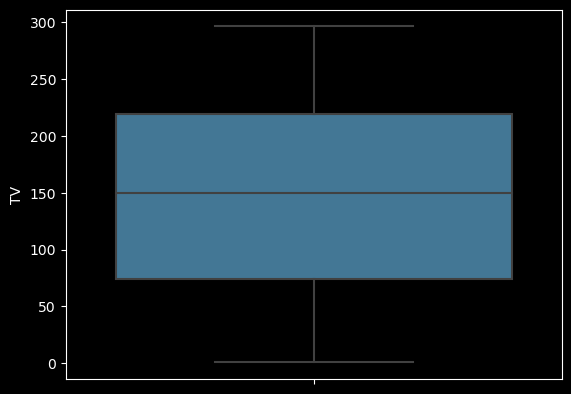

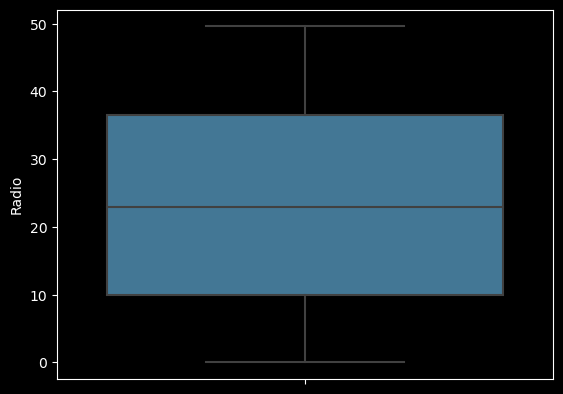

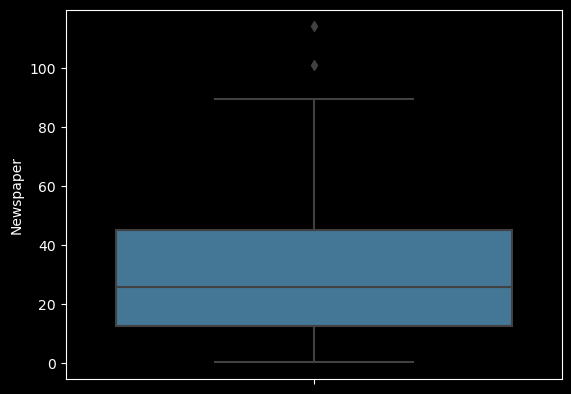

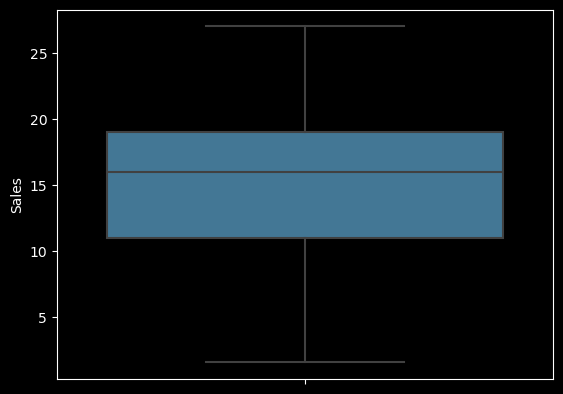

In [24]:
for i in df.columns:
    sns.boxplot(y=df[i],palette='mako')
    plt.show();
    

# setting outlier limits

In [25]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL
    

In [26]:
for i in df.columns:
    UL,LL=outlier_limit(df[i])
    df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])

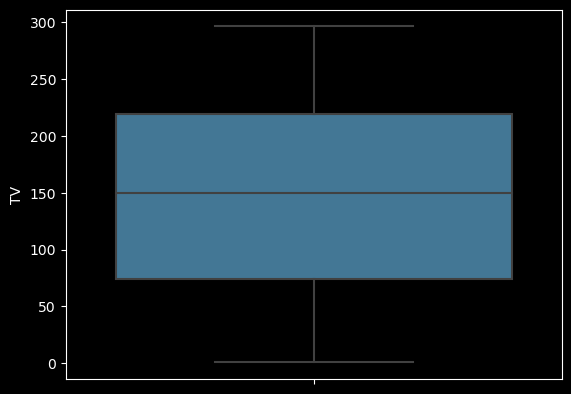

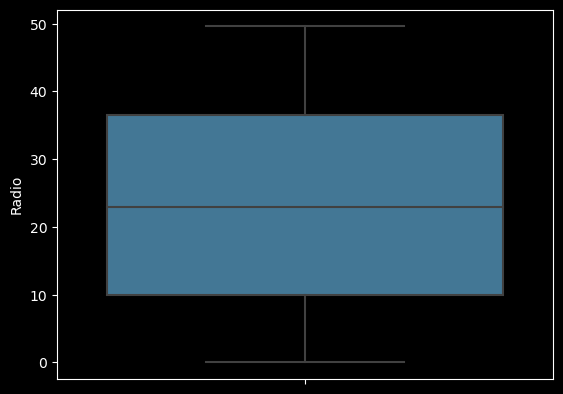

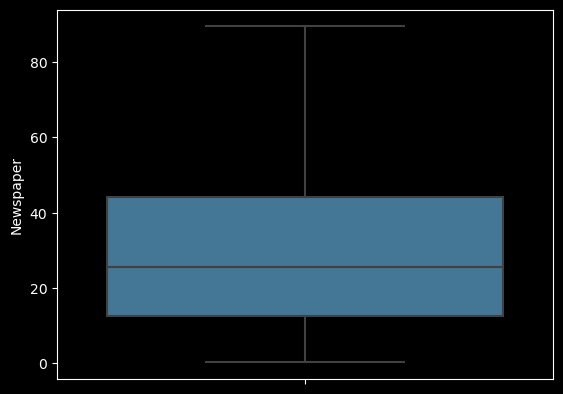

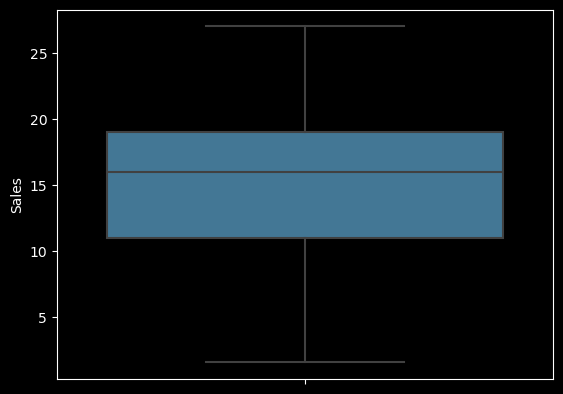

In [27]:
#LETS PLOT THE BARPLOT AGAIN TO SEE THE DIFFERENCE
for i in df.columns:
    sns.boxplot(y=df[i],palette='mako')
    plt.show();

In [38]:
x=df[['TV','Radio','Newspaper']].values

In [39]:
x

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [265.6,  20. ,   0.3],
       [ 9

In [40]:
#selecting the target columns
y=df[['Sales']].values
y

array([[22.1],
       [10.4],
       [12. ],
       [16.5],
       [17.9],
       [ 7.2],
       [11.8],
       [13.2],
       [ 4.8],
       [15.6],
       [12.6],
       [17.4],
       [ 9.2],
       [13.7],
       [19. ],
       [22.4],
       [24.4],
       [11.3],
       [14.6],
       [18. ],
       [17.5],
       [ 5.6],
       [20.5],
       [ 9.7],
       [17. ],
       [15. ],
       [20.9],
       [18.9],
       [10.5],
       [21.4],
       [11.9],
       [13.2],
       [17.4],
       [11.9],
       [17.8],
       [25.4],
       [14.7],
       [10.1],
       [21.5],
       [16.6],
       [17.1],
       [20.7],
       [17.9],
       [ 8.5],
       [16.1],
       [10.6],
       [23.2],
       [19.8],
       [ 9.7],
       [16.4],
       [10.7],
       [22.6],
       [21.2],
       [20.2],
       [23.7],
       [ 5.5],
       [13.2],
       [23.8],
       [18.4],
       [ 8.1],
       [24.2],
       [20.7],
       [14. ],
       [16. ],
       [11.3],
       [11. ],
       [13

In [41]:
sc=StandardScaler()

In [42]:
x=sc.fit_transform(x)

In [43]:
#splitting into training and testing data
x_train ,x_test, y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [44]:
#model building
model=LinearRegression()

In [45]:
#fitting the model
model.fit(x_train,y_train)

LinearRegression()

In [46]:
df.dropna(inplace=True)

In [47]:
#coefficent
model.coef_


array([[4.58728632, 1.59656831, 0.14802757]])

In [48]:
#intercept
model.intercept_

array([15.02376325])

In [49]:
#training accuaracy
training_score=model.score(x_train,y_train)*100
training_score

89.9539466739514

In [50]:
#testing accuaracy
testing_score=model.score(x_test,y_test)*100
testing_score

90.26978637834333

In [51]:
#r2_score
R2_score=r2_score(y_test,model.predict(x_test))*100
R2_score

90.26978637834333

In [52]:
#mean absolllute error
mae=mean_absolute_error(y_test,model.predict(x_test))*100
mae

117.80466149681033

In [53]:
#mean squared error
mse=mean_squared_error(y_test,model.predict(x_test))*100
mse

270.71637512130195

In [54]:
y_pred=model.predict(x)

In [55]:
y_pred

array([[21.37930356],
       [11.37615352],
       [10.79320509],
       [17.44799966],
       [15.73954313],
       [10.70016397],
       [11.21905667],
       [13.08585299],
       [ 5.11742377],
       [15.60907798],
       [ 8.77918738],
       [18.59094932],
       [ 9.96063182],
       [10.53973475],
       [19.28376552],
       [20.45950239],
       [24.23708226],
       [10.48637563],
       [15.06202574],
       [19.54713418],
       [17.91880661],
       [ 7.2039908 ],
       [18.71943633],
       [ 9.2641766 ],
       [19.08997511],
       [15.35958871],
       [19.30907058],
       [20.89739749],
       [10.2403987 ],
       [23.54762361],
       [12.6519719 ],
       [10.03211776],
       [20.87295586],
       [ 9.77657696],
       [20.57106707],
       [23.54024635],
       [14.09374668],
       [ 9.8712267 ],
       [20.98549891],
       [17.95153332],
       [17.82599344],
       [23.22019359],
       [16.65361915],
       [ 8.85421009],
       [16.4975635 ],
       [10

In [56]:
#creating a DataFrame with actual value in order to compare them
OUTPUT=pd.DataFrame(zip(y,y_pred),columns=('ACTUAL','PREDICTED'),dtype=float)
OUTPUT.head()


,ACTUAL,PREDICTED
0,22.1,21.379304
1,10.4,11.376154
2,12.0,10.793205
3,16.5,17.448000
4,17.9,15.739543


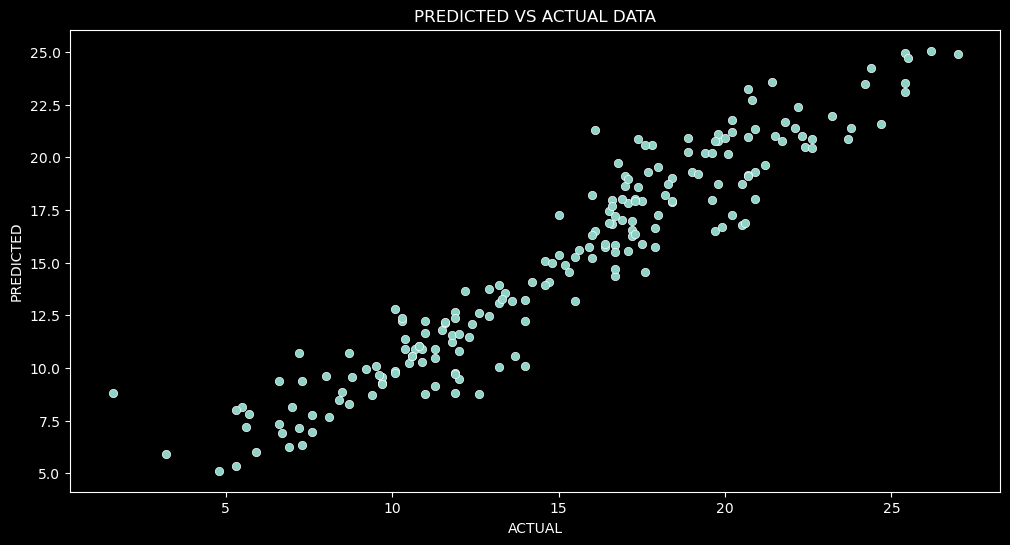

In [57]:
#visualising the output
plt.figure(figsize=(12,6))
plt.title ("PREDICTED VS ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");


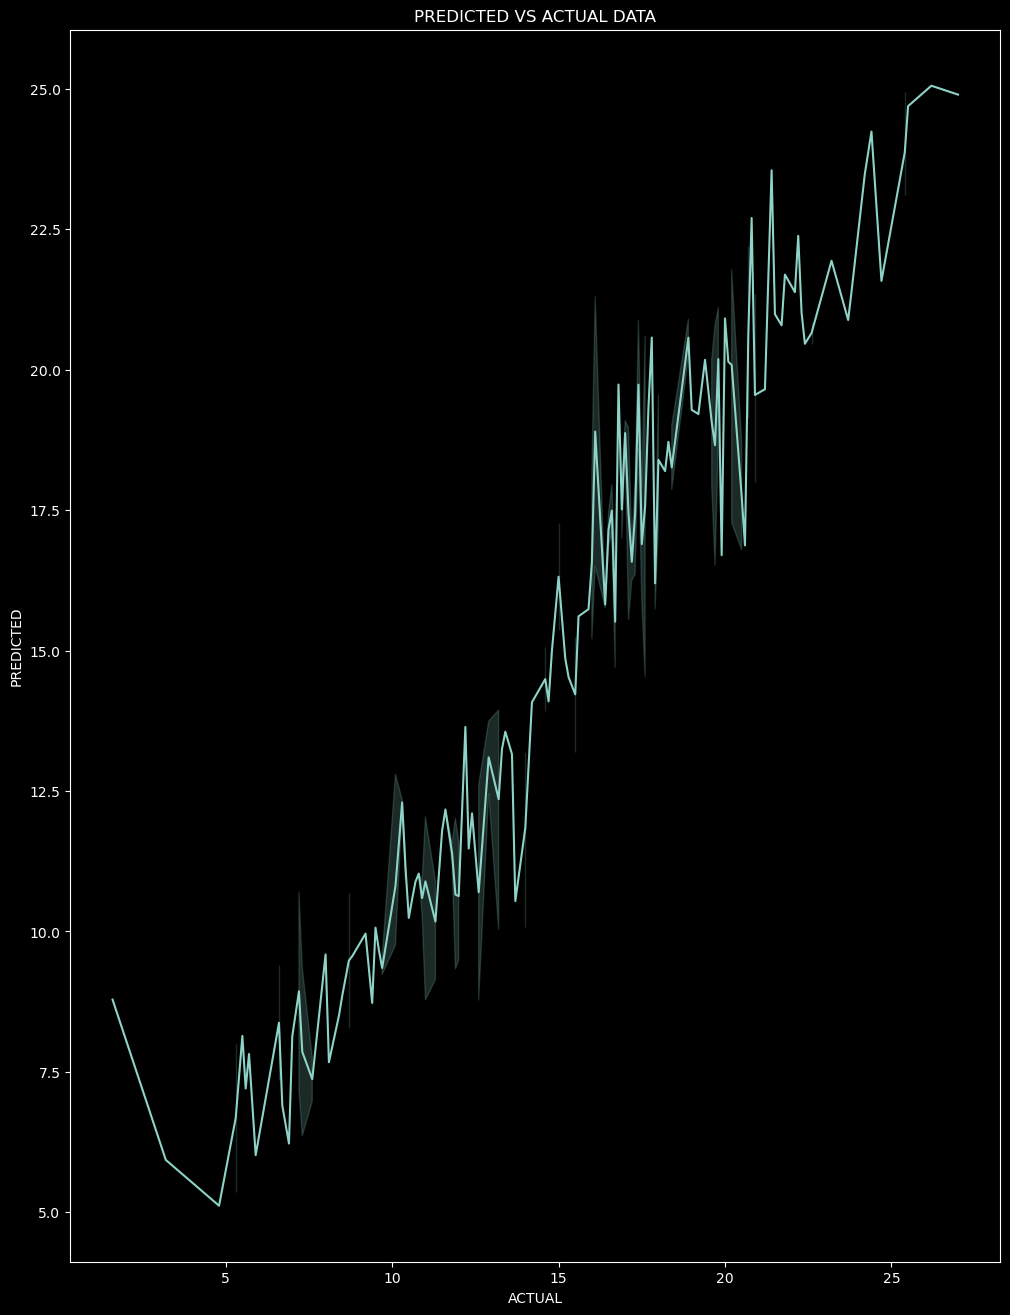

In [58]:
plt.figure(figsize=(12,16))
plt.title("PREDICTED VS ACTUAL DATA")
sns.lineplot(data=OUTPUT,x="ACTUAL",y="PREDICTED");